<a href="https://colab.research.google.com/github/yorkjong/vistock/blob/main/notebooks/vistock_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### vistock -- an open source package that provides a lot of plot() functions to visualize stocks.

### Install and Setup (this section will be executed automatically)

#### Install Required Packages

In [1]:
%pip install git+https://github.com/yorkjong/vistock.git

!wget -O NotoSansTC-Regular.ttf https://share.cole.tw/d/Tools%20-%20MAC/Fonts/Noto_Sans_TC/static/NotoSansTC-Regular.ttf?sign=bATsZP5QZdI_2EM15sAbcAE48Cacle91CpwUNOCMuM8=:0

  Cloning https://github.com/yorkjong/vistock.git to /tmp/pip-req-build-2og8qpgx
  Running command git clone --filter=blob:none --quiet https://github.com/yorkjong/vistock.git /tmp/pip-req-build-2og8qpgx
  Resolved https://github.com/yorkjong/vistock.git to commit 10c0da0090e5f5c90fd0439bd289b25fcf5d92c8
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00
  Created wheel for vistock: filename=vistock-0.5.1-py3-none-any.whl size=80466 sha256=42666d27fddc9ca1931ca2e27d07033402cb9a237f97d5cd680cfa06bc3c319d
  Stored in directory: /tmp/pip-ephem-wheel-cache-t7trts0o/wheels/1f/ff/6c/9ec0adab3f1af71ff9ba3e4eb52d0f3849d3a695b812dc509a
Successfully built vistock
--2024-09-06 21:07:57--  https://share.cole.tw/d/Tools%20-%20MAC/Fonts/Noto_Sans_TC/static/NotoSansTC-Regular.ttf?sign=bATsZP5QZdI_2EM15sAbcAE48Cacle91CpwUNOCMuM8=:0
Resolving share.cole.tw (share.cole.tw)... 180.218.0.193
Connecting to share.cole.tw (share.cole.tw)|180

#### Setup and Configuration

In [2]:
# @title Set Chinese Font for matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fm.fontManager.addfont('NotoSansTC-Regular.ttf')
font_name = 'Noto Sans TC'
if font_name not in plt.rcParams['font.sans-serif']:
    plt.rcParams['font.sans-serif'].insert(0, font_name)

### Usage Explanation

#### Parameters

kind (圖種類):
* To select a kind of from charts

symbol (股票代碼):
* The symbol of a stock (e.g., TSLA)
* This also suport some to crypto to USD pairs (e.g., BTC-USD, ETH-USD)

period (整張圖的繪製區間):
* the period of data to download

interval (每筆k線資料的間隔):
* the interval of an OHLC data item

legend_location（圖例說明匡的位置; for mplfinance version）:
* the loacation of the legend

total_bins（價量累積直方圖中價格區間分組數量; for Profile charts）:
* the total bins on a Price by Volume chart (so-called Volume Profile)

hides_nontrading（是否隱藏非交易的期間; for Plotly version）
* decide if hides non-trading time-periods.

hbar_align_on_right:
* decide if the price-by-volume bars align on right. True to set the starting position of the horizontal bars to the right; False the left.

#### Colab Forms
* Forms provide an easy way to parameterize code.
* Forms are Google Colab specific features extending from the original Jupyter Notebooks.
* After running a cell manually, it will auto-run if you change the selected value.


### Plot with mplfinance

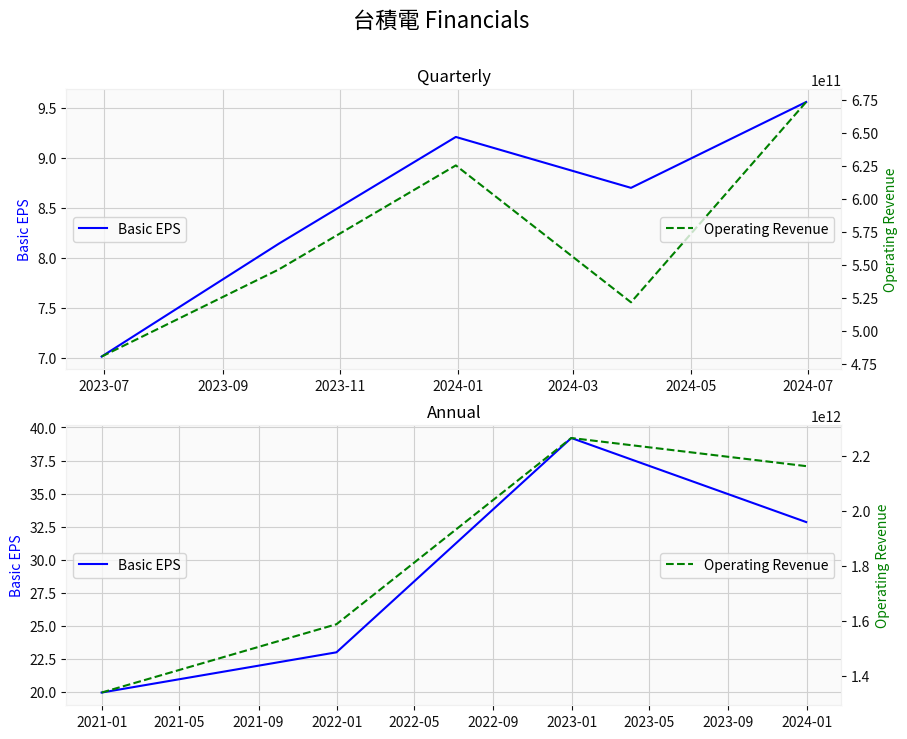

In [9]:
# @title
kind = "Financials" #@param ["Price, Volume, RSI", "Volume Profile", "Turnover Profile", "BullRun and Drawdown", "Financials"]
symbol = "台積電" #@param ["TSLA", "NVDA", "MSFT", "AAPL", "GOOG", "MSTR", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "1y" #@param ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
interval = '1d' #@param ['1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo']
legend_location = "best" #@param ["best", "upper right", "upper left", 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center']
total_bins = 28 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}
style = "yahoo" # @param ["yahoo","charles","tradingview","binance","binancedark","mike","nightclouds","checkers","ibd","sas","starsandstripes","kenan","blueskies","brasil"]
hides_nontrading = False #@param {type:"boolean"}

import vistock.mpl as vsm

tbl = {
    'Price, Volume, RSI': vsm.rsi,
    'Volume Profile': vsm.profile.Volume,
    'Turnover Profile': vsm.profile.Turnover,
    'BullRun and Drawdown': vsm.bull_draw,
    'Financials': vsm.financials,
}

module = tbl[kind]
if kind == 'Financials':
    module.plot(symbol, style=style)
elif kind.endswith('Profile'):
    module.plot(symbol, period=period, interval=interval,
                legend_loc=legend_location, total_bins=total_bins,
                style=style, hides_nontrading=hides_nontrading)
else:
    module.plot(symbol, period=period, interval=interval,
                legend_loc=legend_location,
                style=style, hides_nontrading=hides_nontrading)


### Plot with Plotly

In [8]:
# @title
kind = "Financials" #@param ["Price and Volume Overlaid", "Price and Volume Separated", "Volume Profile with 2 Subplots", "Turnover Profile with 2 Subplots", "Volume Profile with 4 Subplots", "Turnover Profile with 4 Subplots", "BullRun and Drawdown", "Financials"]
symbol = "TSLA" #@param ["TSLA", "NVDA", "MSFT", "AAPL", "GOOG", "MSTR", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "1y" #@param ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
interval = '1d' #@param ['1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo']
total_bins = 42 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}
template = "simple_white" # @param ["plotly","plotly_white","plotly_dark","ggplot2","seaborn","simple_white","presentation","xgridoff","ygridoff"]
hbar_align_on_right = True #@param {type:"boolean"}
hides_nontrading = True #@param {type:"boolean"}

import vistock.plotly as vsp

tbl = {
    'Price and Volume Overlaid': vsp.pv1s,
    'Price and Volume Separated': vsp.pv2s,
    'Volume Profile with 2 Subplots': vsp.prf2s.Volume,
    'Turnover Profile with 2 Subplots': vsp.prf2s.Turnover,
    'Volume Profile with 4 Subplots': vsp.prf4s.Volume,
    'Turnover Profile with 4 Subplots': vsp.prf4s.Turnover,
    'BullRun and Drawdown': vsp.bull_draw,
    'Financials': vsp.financials,
}

module = tbl[kind]
if kind == 'Financials':
    module.plot(symbol, template=template)
elif kind.endswith('4 Subplots'):
    module.plot(symbol, period=period, interval=interval, total_bins=total_bins,
                template=template, hides_nontrading=hides_nontrading)
elif kind.endswith('2 Subplots'):
    module.plot(symbol, period=period, interval=interval, total_bins=total_bins,
                hbar_align_on_right=hbar_align_on_right,
                template=template, hides_nontrading=hides_nontrading)
else:
    module.plot(symbol, period=period, interval=interval,
                template=template, hides_nontrading=hides_nontrading)

### Misc Tests

In [ ]:
from vistock import tw

tw.similar_stocks('印度')

[('富邦印度', '00652'), ('富邦印度正2', '00653L'), ('富邦印度反1', '00654R')]

In [ ]:
print(tw.as_yfinance('2330'))
print(tw.as_yfinance('元太'))
tw.as_yfinance('星宇航空')

2330.TW
8069.TWO


'2646.TWO'